In [1]:
import pandas as pd

In [2]:
EXCEL_PATH = "/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Daten/crypto_7years_daily.xlsx"

In [3]:
import pandas as pd
from backtester import Backtester
from strategies.simple_moving_average_long import TrendFollowingStrategy
from strategies.mean_reversion import MeanReversionStrategy

strategy_class = TrendFollowingStrategy
param_grid = {
    "window": range(10,300,20),
}
initial_cash = 10000

# Load all sheet names (one per asset)
xls = pd.read_excel(EXCEL_PATH,sheet_name="Cleaned data", parse_dates=["DATES"])
xls.drop_duplicates(inplace=True)
xls.set_index("DATES", inplace=True)

from itertools import product

def get_param_combinations(grid):
    keys = list(grid.keys())
    values = list(grid.values())
    for combo in product(*values):
        yield dict(zip(keys, combo))

results = []


In [4]:
xls.head()

,Enjin Coin,Maker,Solana,Cardano,Monero,Litecoin,Dogecoin,Chainlink,Bitcoin,XRP,...,Tether,Dai,USD Coin,Basic Attention Token,Cosmos,Cosmos.1,TerraUSD,Decentraland,Shiba Inu,Aave
DATES,,,,,,,,,,,,,,,,,,,,,
2018-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-11,NaN,NaN,NaN,NaN,NaN,189.485,NaN,NaN,9613.95,0.8200,...,0.9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-12,NaN,NaN,NaN,NaN,NaN,178.825,NaN,NaN,9017.65,0.7819,...,0.9989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-13,NaN,NaN,NaN,NaN,NaN,174.265,NaN,NaN,9062.92,0.7697,...,1.0016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-14,NaN,NaN,NaN,NaN,NaN,162.745,NaN,NaN,8304.32,0.6988,...,0.9983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#get columns names in the dataframe
assets = xls.columns.tolist()

In [6]:
#calculate silence for each asset
# and run backtesting for each combination of parameters
for asset in assets:
    df = xls[[asset]]
    for params in get_param_combinations(param_grid):
        strategy = strategy_class(df.columns[0],**params)

        bt = Backtester(
            data=df.copy(),  # changed from file path to raw data
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()  # e.g., return, sharpe
        }

        results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="sharpe", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df.head(50)


/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:83: RuntimeWarning: invalid value encountered in scalar power
  annualized_return = (1 + net_return) ** (252 / len(self.results)) - 1
/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:83: RuntimeWarning: invalid value encountered in scalar power
  annualized_return = (1 + net_return) ** (252 / len(self.results)) - 1
/Users/janehrlinspiel/Library/CloudStorage/OneDrive-Persönlich/Crypto/Code/Backtester_git/backtester.py:83: RuntimeWarning: invalid value encountered in scalar power
  annualized_return = (1 + net_return) ** (252 / len(self.results)) - 1


,asset,window,total_return,annualized_return,sharpe,num_trades,total_fees_paid,fees_as_pct_of_gross
0,Solana,30,5.0080,1.4170,1.82,36,0.0144,0.28
1,Solana,10,3.9514,1.1975,1.66,66,0.0264,0.65
2,Solana,50,2.2011,0.7730,1.26,24,0.0096,0.43
3,Solana,70,1.6274,0.6087,1.10,24,0.0096,0.58
4,Bitcoin,110,20.3939,0.3684,1.03,50,0.0200,0.10
5,Fantom,30,12.8090,0.6265,1.03,84,0.0336,0.25
6,Bitcoin,130,16.4092,0.3398,0.96,44,0.0176,0.11
7,Bitcoin,50,15.3512,0.3313,0.96,124,0.0496,0.31
8,Binance Coin,50,20.9919,0.4480,0.91,136,0.0544,0.24
9,Bitcoin,90,10.6436,0.2858,0.86,94,0.0376,0.34


In [7]:
results_df[results_df["asset"] == 'Bitcoin'].sort_values(by="window", ascending=False)

,asset,window,total_return,annualized_return,sharpe,num_trades,total_fees_paid,fees_as_pct_of_gross
61,Bitcoin,290,2.5954,0.1400,0.52,63,0.0252,0.94
51,Bitcoin,270,3.1868,0.1579,0.56,55,0.0220,0.67
66,Bitcoin,250,2.0085,0.1194,0.48,66,0.0264,1.26
67,Bitcoin,230,1.9111,0.1156,0.48,64,0.0256,1.29
43,Bitcoin,210,3.6130,0.1695,0.60,54,0.0216,0.58
29,Bitcoin,190,4.9887,0.2011,0.67,42,0.0168,0.33
21,Bitcoin,170,6.6738,0.2320,0.74,50,0.0200,0.29
17,Bitcoin,150,7.8356,0.2499,0.78,56,0.0224,0.28
6,Bitcoin,130,16.4092,0.3398,0.96,44,0.0176,0.11
4,Bitcoin,110,20.3939,0.3684,1.03,50,0.0200,0.10


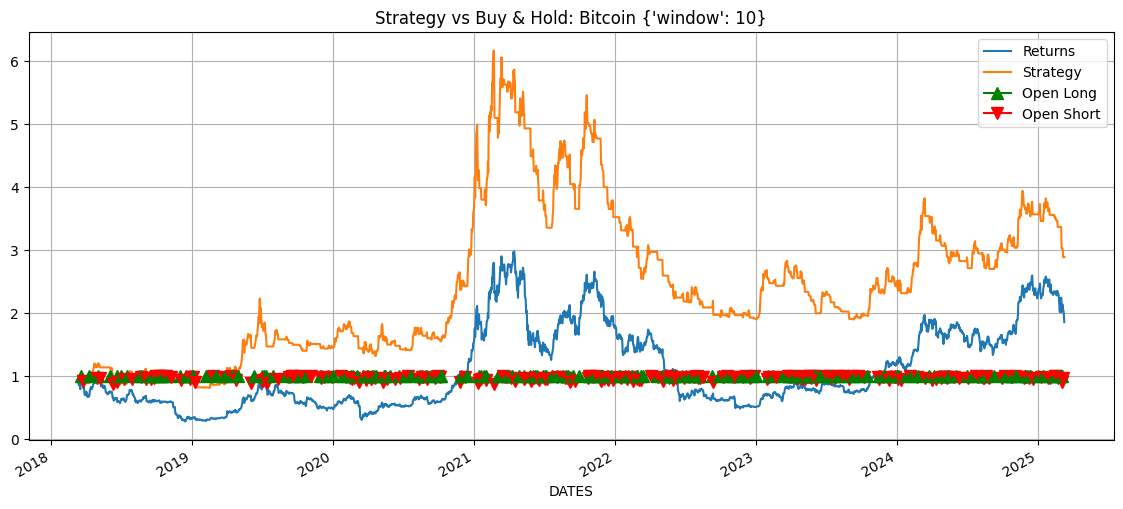

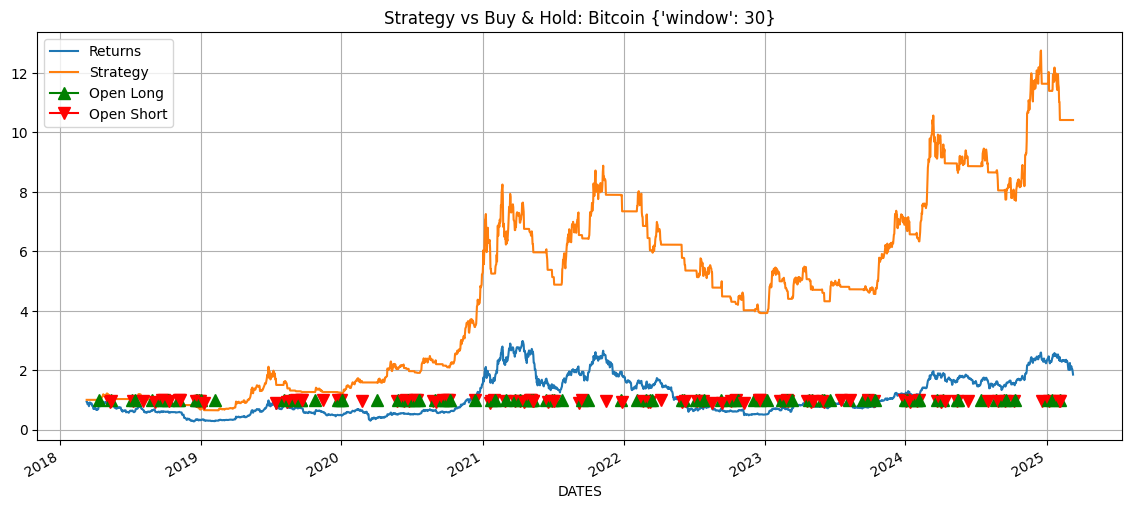

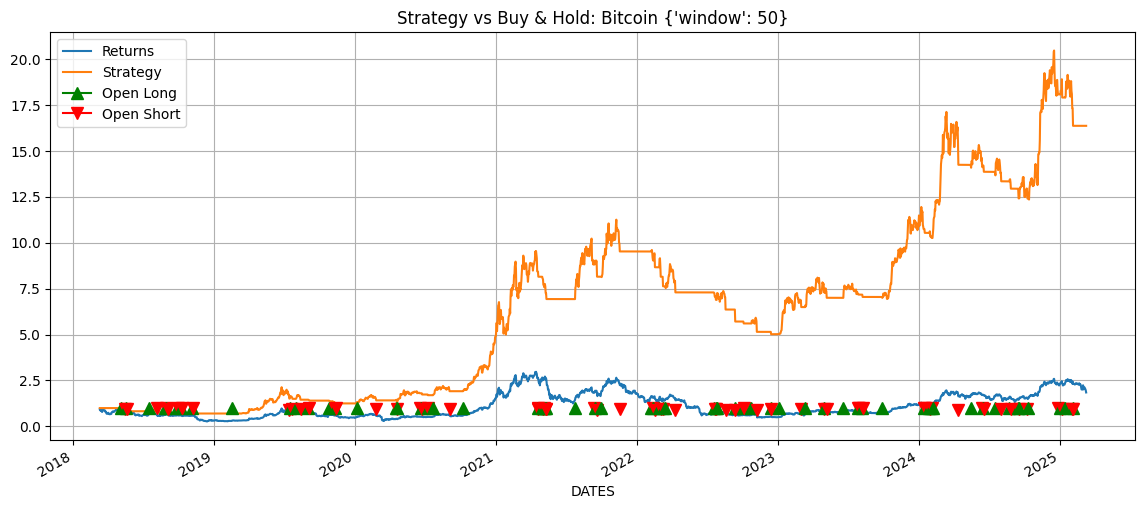

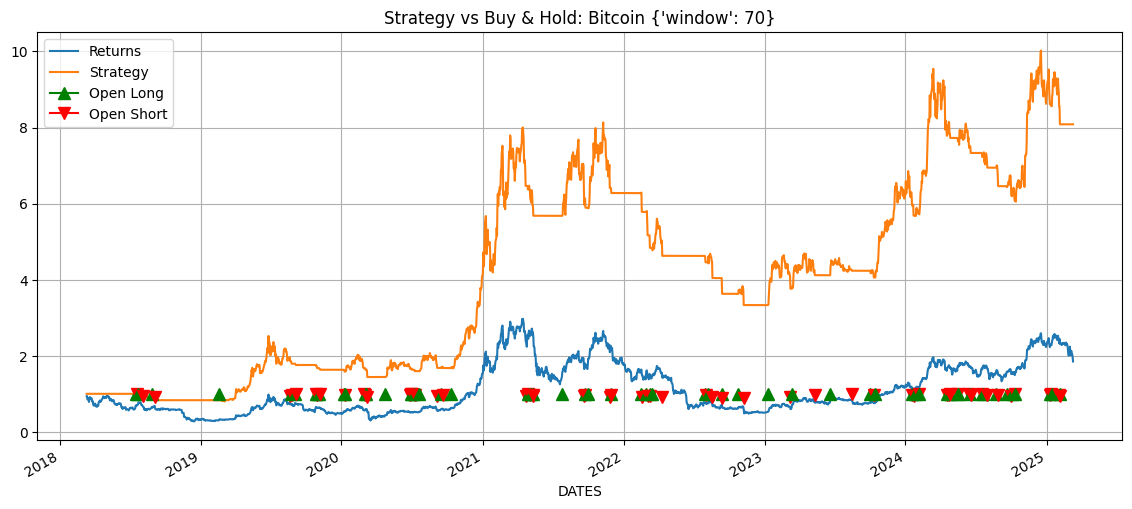

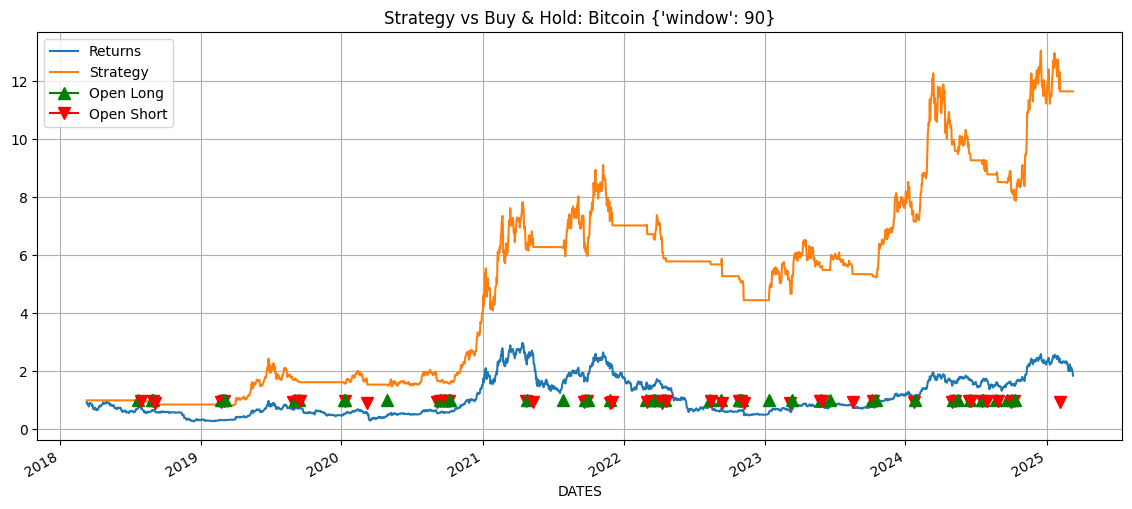

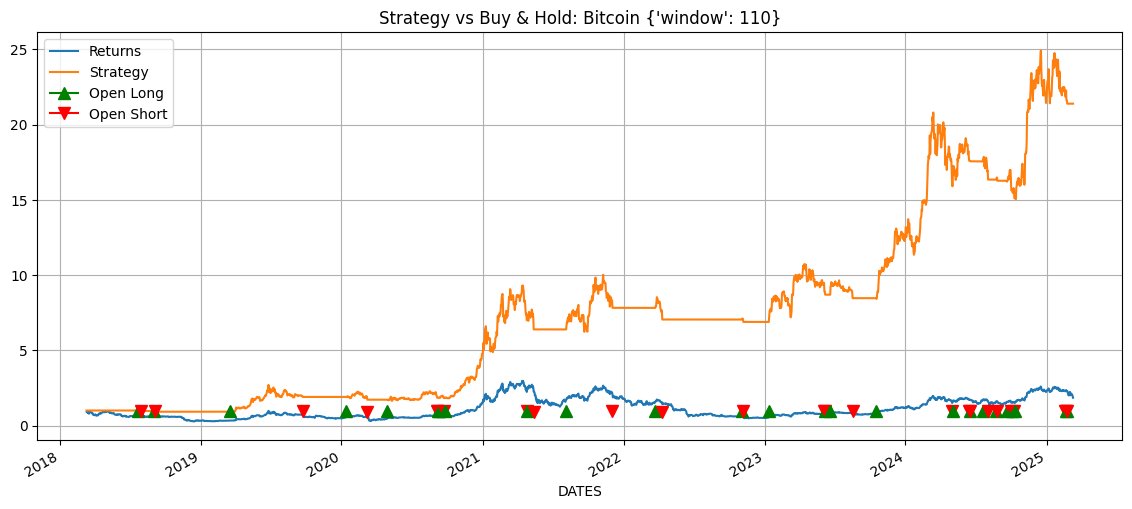

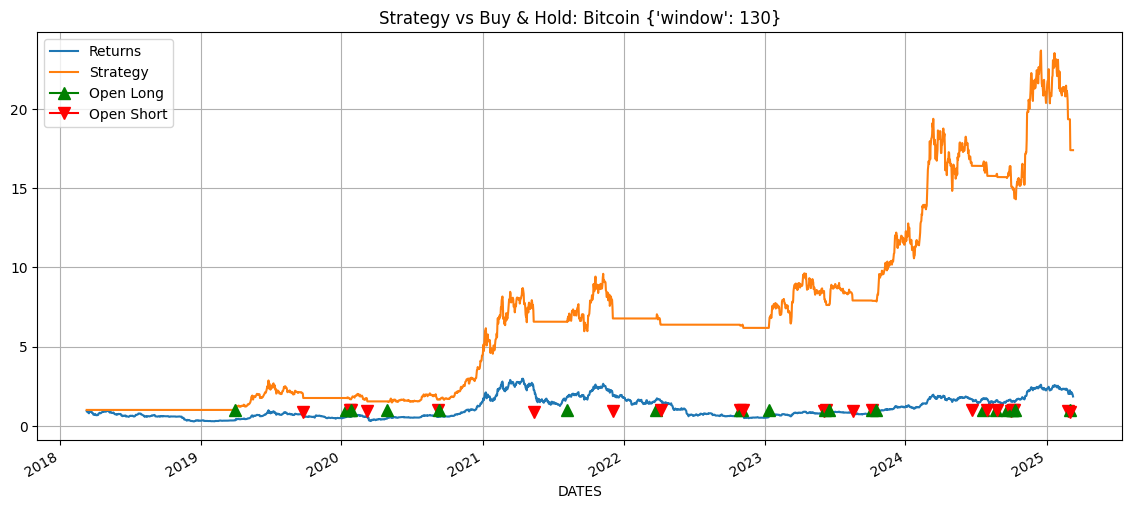

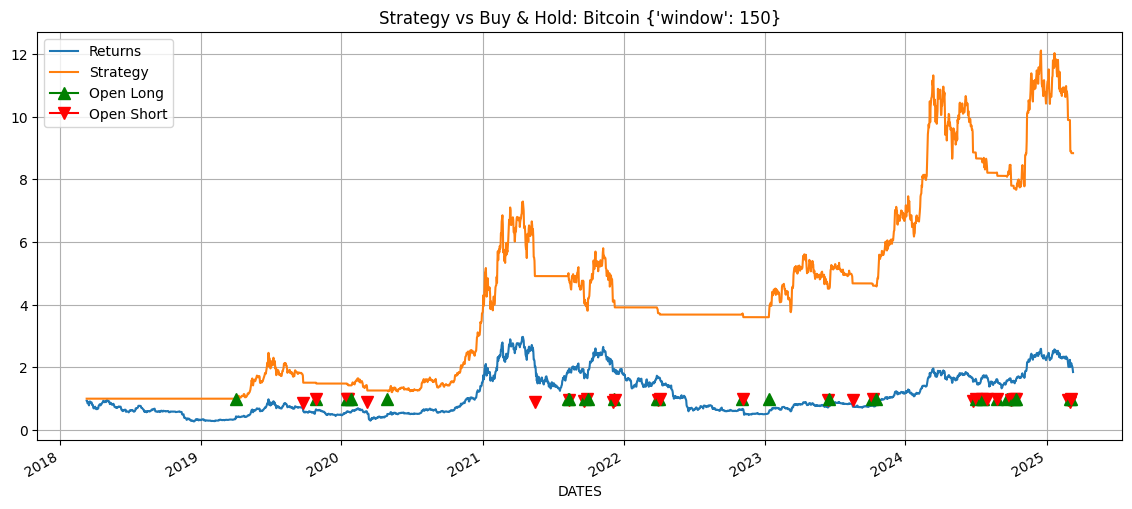

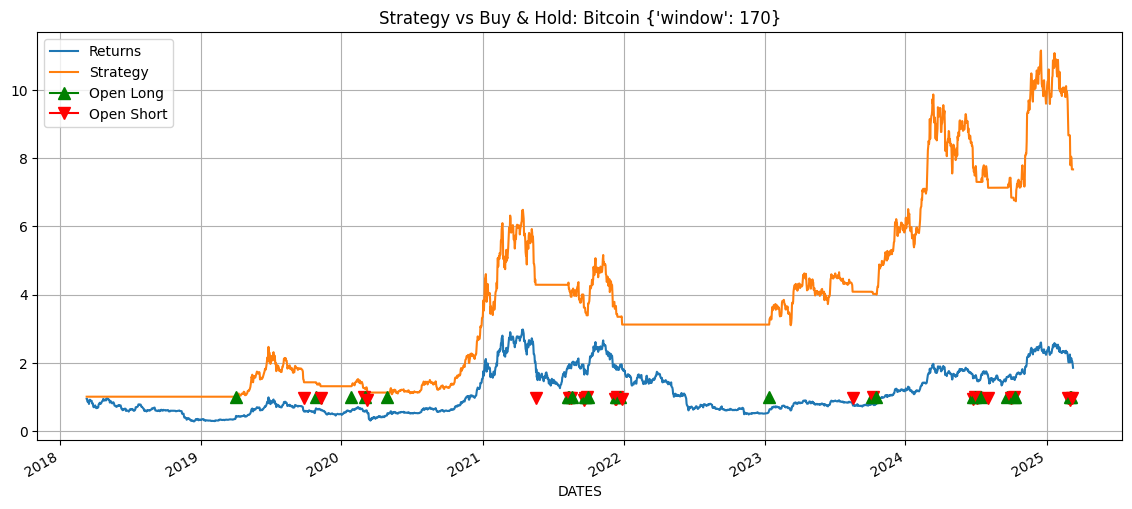

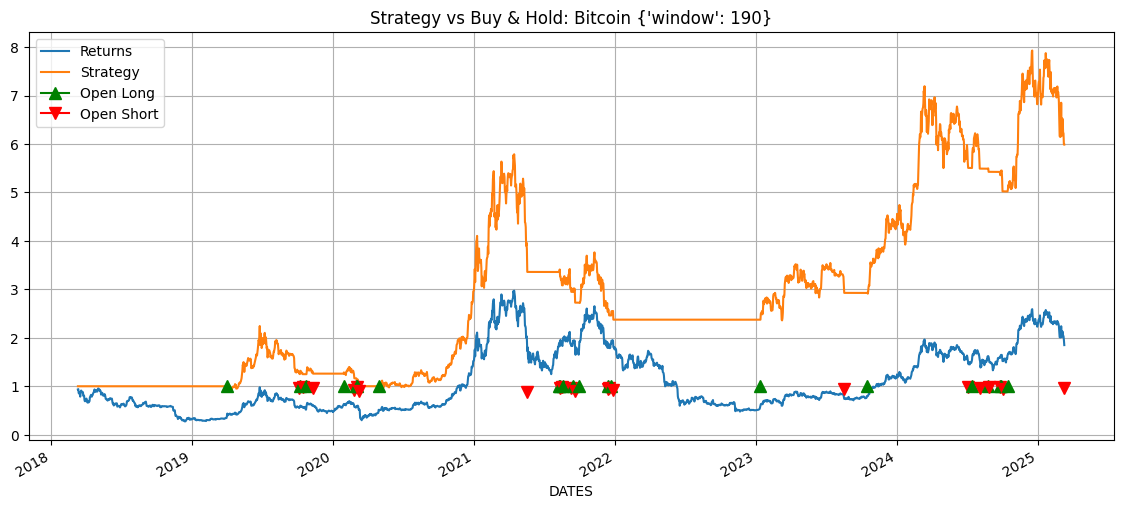

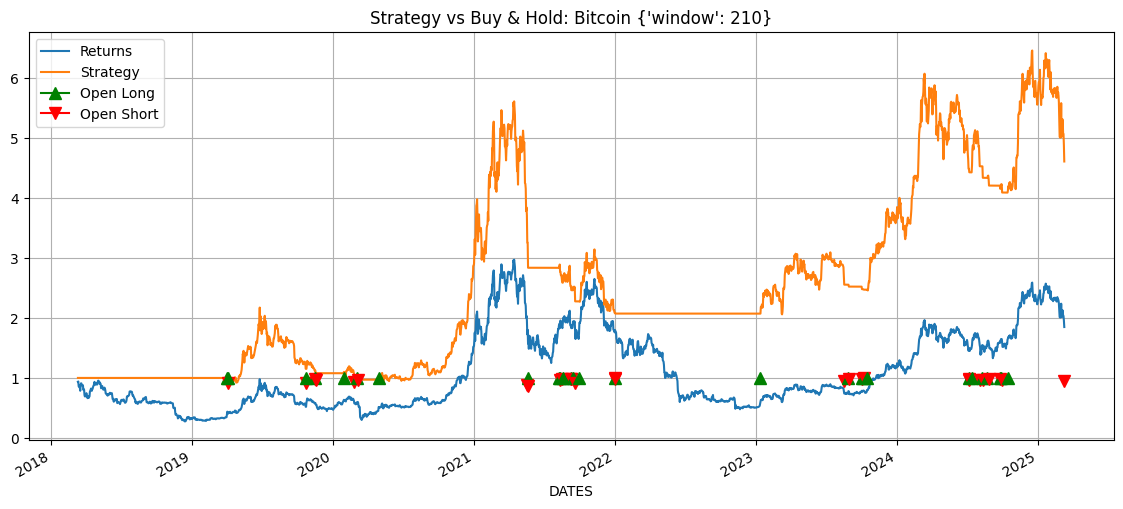

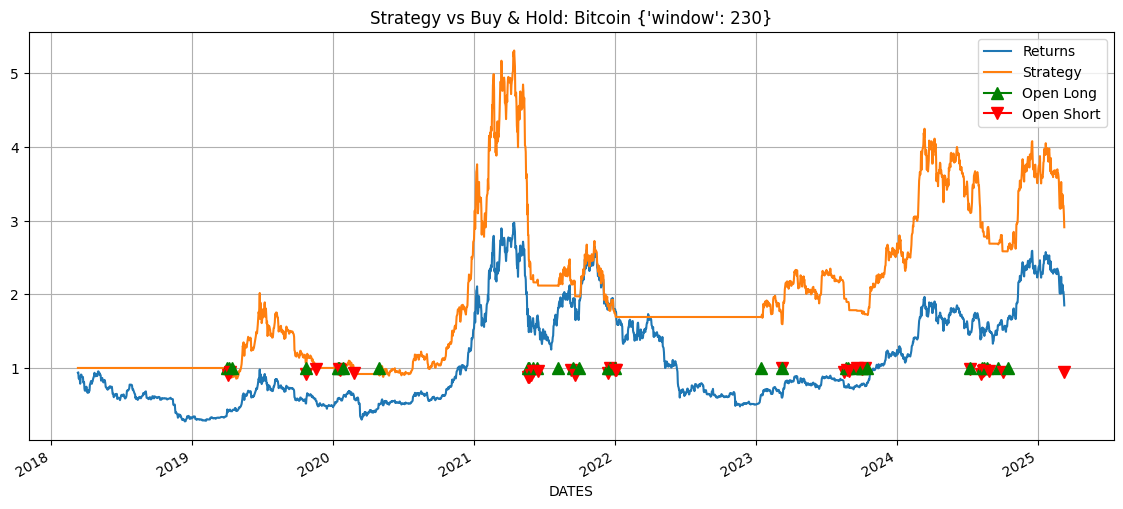

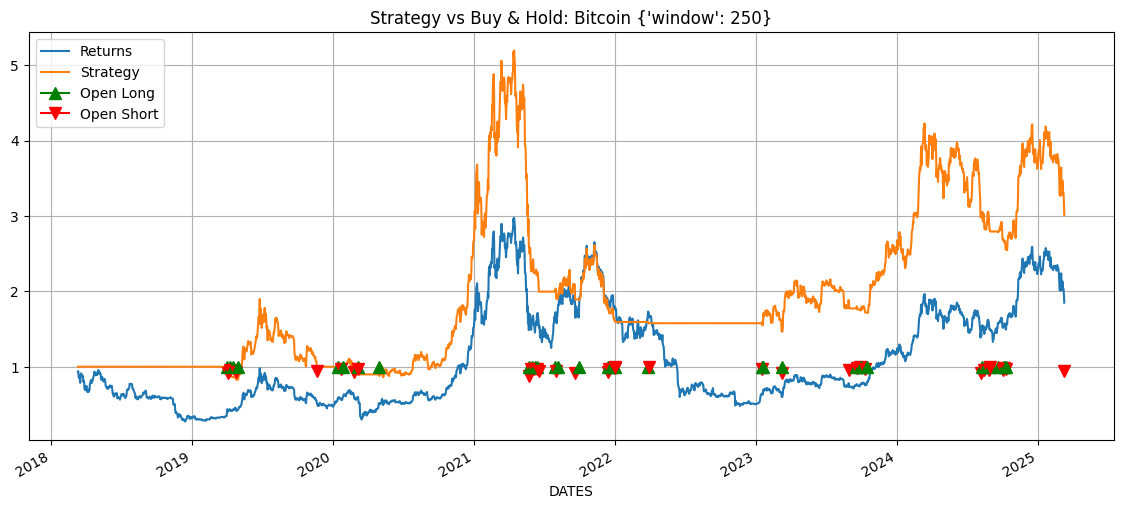

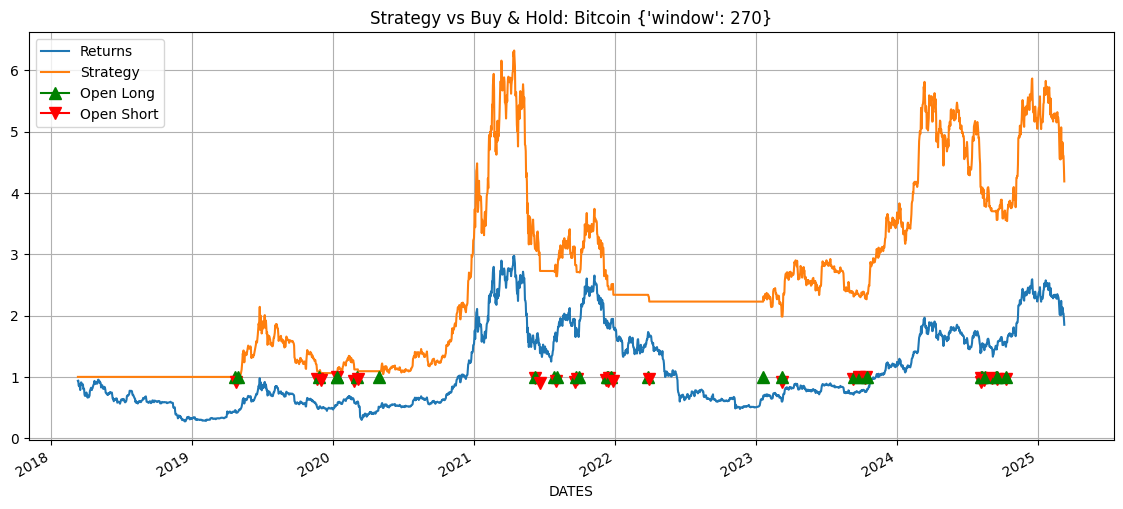

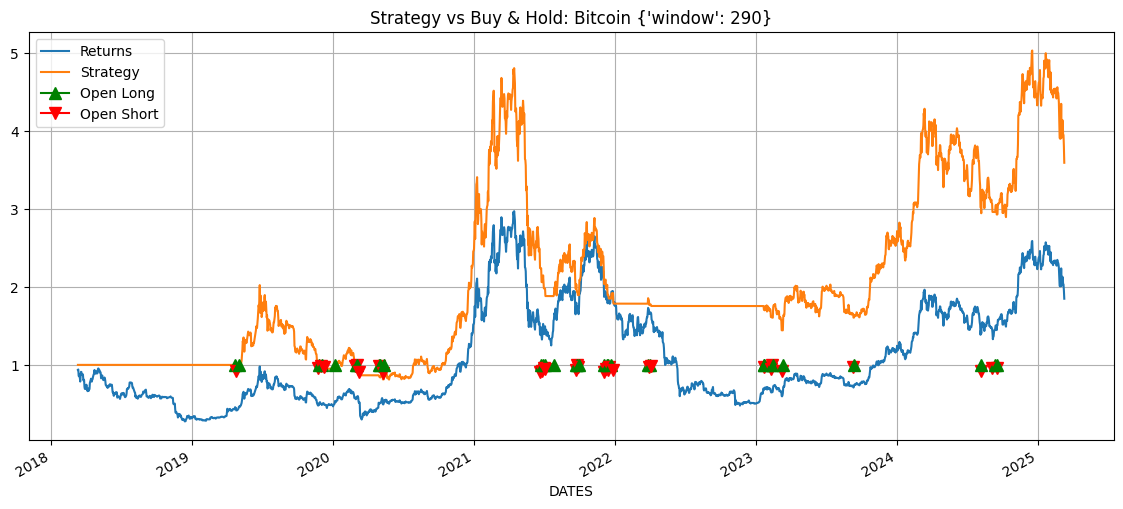

      asset  window  total_return  annualized_return  sharpe  num_trades  \
0   Bitcoin     110       20.3939             0.3684    1.03          50   
1   Bitcoin     130       16.4092             0.3398    0.96          44   
2   Bitcoin      50       15.3512             0.3313    0.96         124   
3   Bitcoin      90       10.6436             0.2858    0.86          94   
4   Bitcoin      30        9.4143             0.2712    0.83         200   
5   Bitcoin     150        7.8356             0.2499    0.78          56   
6   Bitcoin      70        7.0850             0.2386    0.76         116   
7   Bitcoin     170        6.6738             0.2320    0.74          50   
8   Bitcoin     190        4.9887             0.2011    0.67          42   
9   Bitcoin     210        3.6130             0.1695    0.60          54   
10  Bitcoin     270        3.1868             0.1579    0.56          55   
11  Bitcoin     290        2.5954             0.1400    0.52          63   
12  Bitcoin 

In [8]:
assets=['Bitcoin']
new_results = []
for asset in assets:
    df = xls[[asset]]
    for params in get_param_combinations(param_grid):
        strategy = strategy_class(df.columns[0],**params)

        bt = Backtester(
            data=df.copy(),
            strategy=strategy,
            initial_cash=initial_cash
        )
        bt.run()
        bt.evaluate(silent=True)
        bt.plot(params=params)

        result = {
            "asset": asset,
            **params,
            **bt.get_performance_metrics()
        }

        new_results.append(result)

# Convert results to DataFrame
new_results_df = pd.DataFrame(new_results)
new_results_df.sort_values(by="total_return", ascending=False, inplace=True)
new_results_df.reset_index(drop=True, inplace=True)
print(new_results_df)